In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from itertools import islice
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from utils import *
from plots import *

In [2]:
PVALUE = 0.05

### 1. Load data

In [3]:
df = pd.read_csv('../data/llms_dark_patterns_claude_sonnet_3_5.csv', decimal=',')

In [ ]:
text_feature_cols = list(df.columns[24:])
female_df, male_df = prepare_dfs(df, text_feature_cols)

86

### 2. Perform statistical test

In [ ]:
wilcoxon_pvalues = compute_wilcoxon_pvalues(female_df, male_df, text_feature_cols)

# categorize
wilcoxon_pvalues_0_05 = {feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue < PVALUE}
wilcoxon_pvalues_0_95 = {feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue >= PVALUE}

### 3. Distribution plots

/home/wpartycja/mgr-data-science/3sem/data-science-workshop-2025L/text_feature_analysis/plots.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(female_df[col], label="female", fill=True, alpha=0.5, ax=ax, color="hotpink")


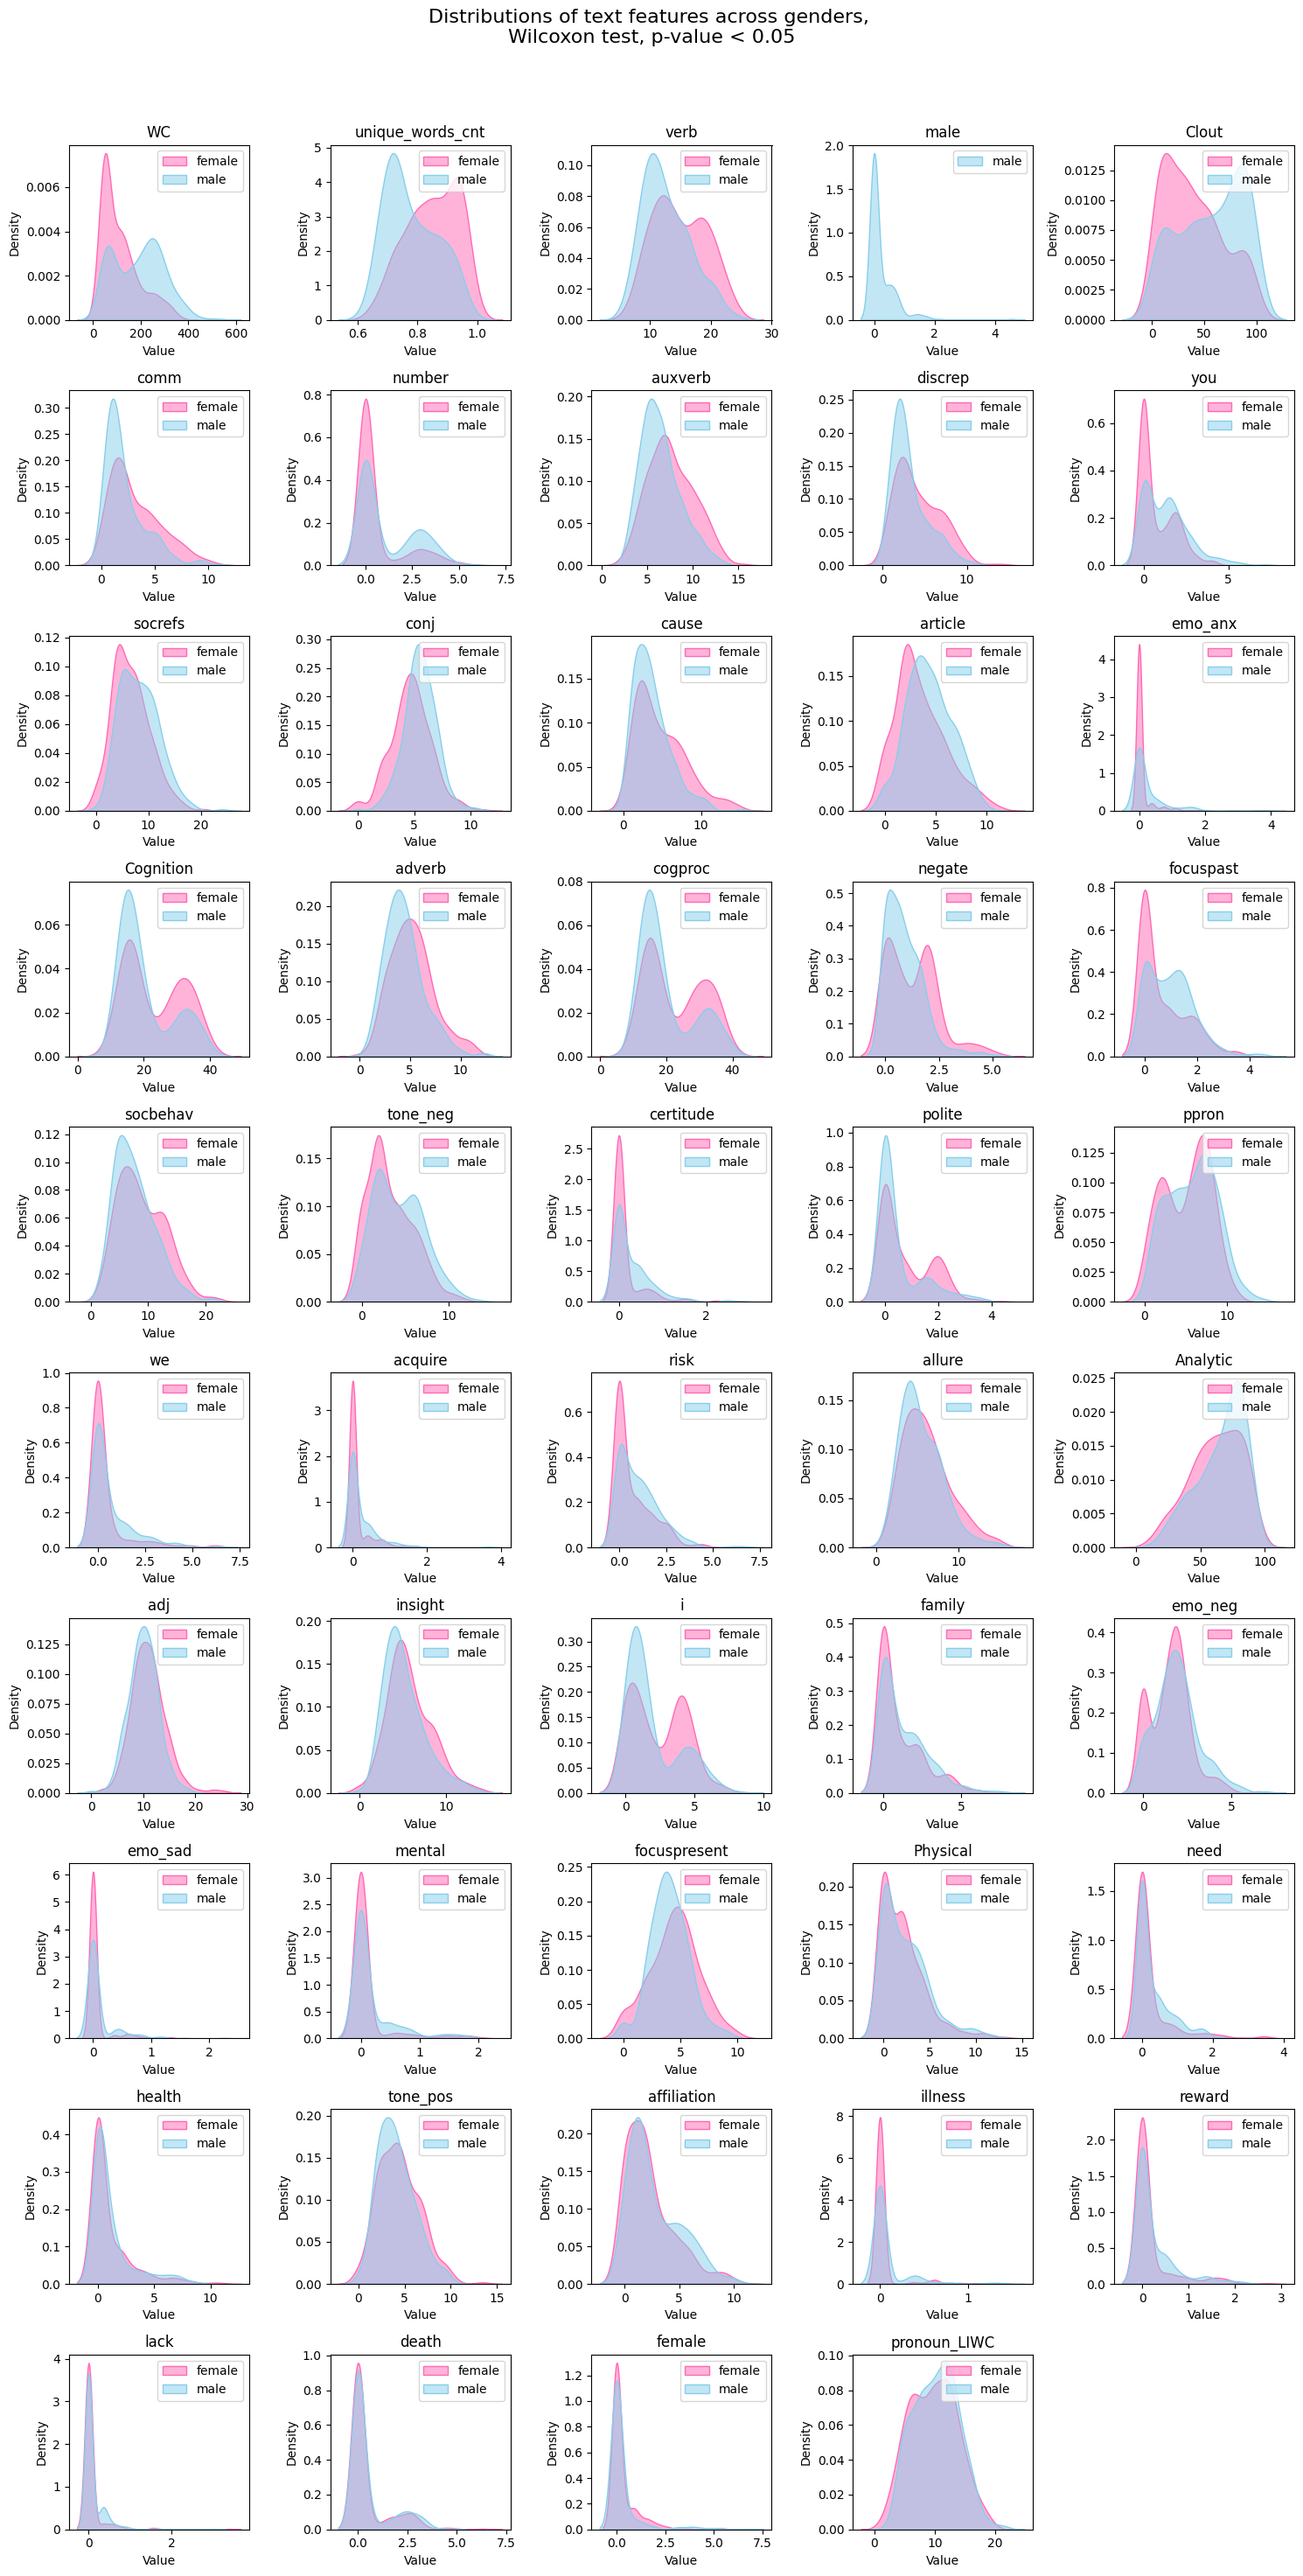

In [ ]:
plot_features_distribution(male_df, female_df, wilcoxon_pvalues_0_05, PVALUE)

/home/wpartycja/mgr-data-science/3sem/data-science-workshop-2025L/text_feature_analysis/utils.py:13: RuntimeWarning: invalid value encountered in scalar divide
  col: mean_differences[col]


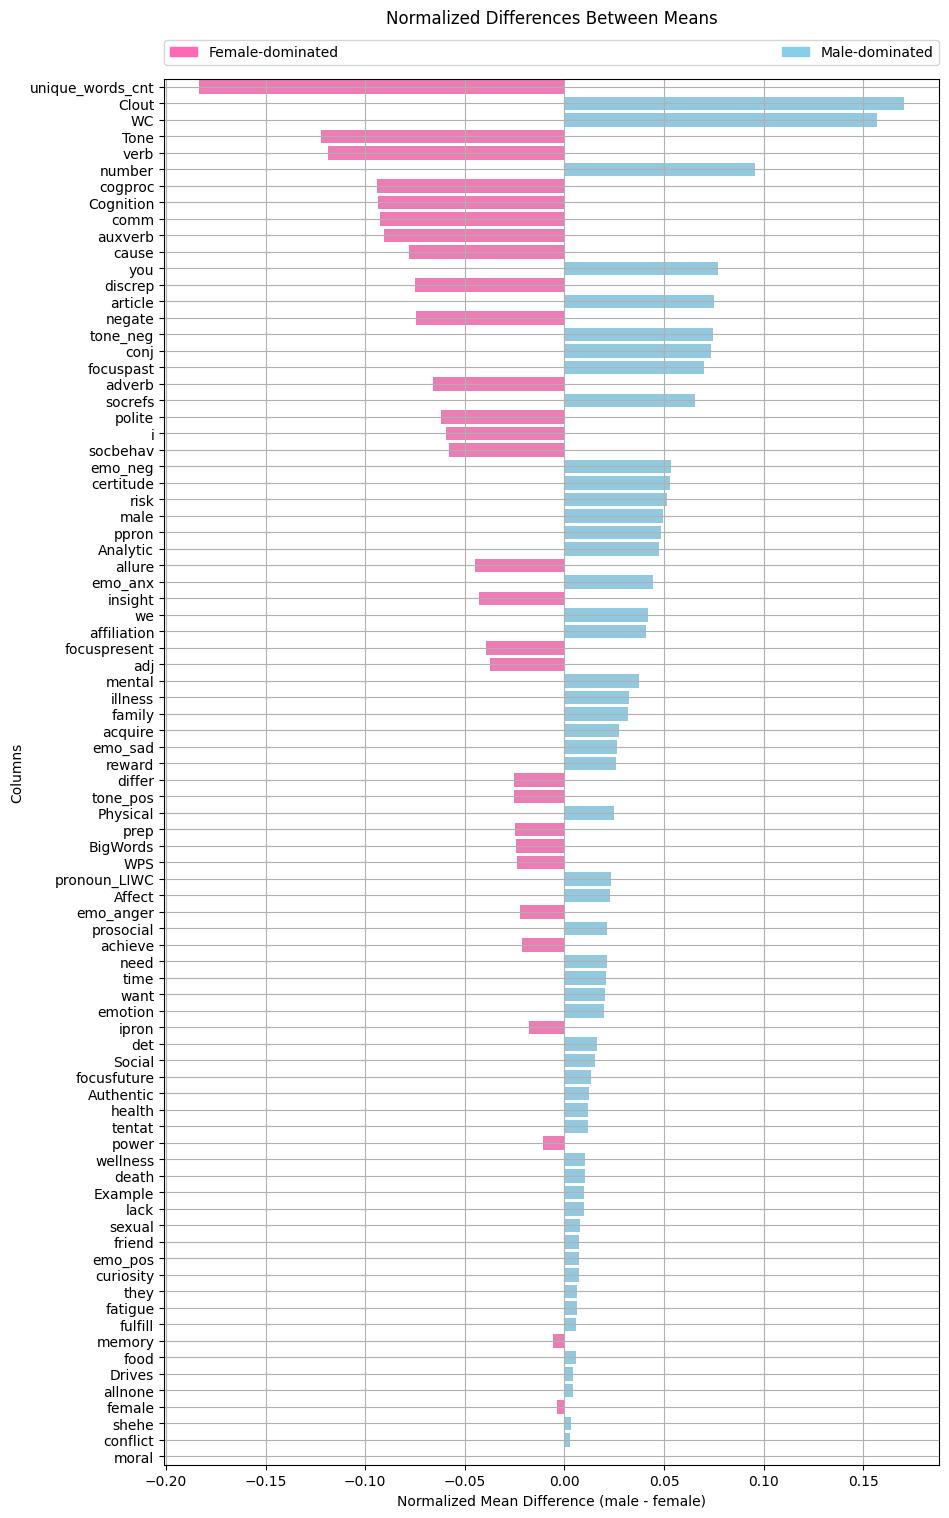

In [ ]:
# Compute mean differences
mean_differences = compute_mean_differences(male_df, female_df, text_feature_cols)

# set colors
colors = ['skyblue' if val > 0 else 'hotpink' for val in mean_differences.values()]

plot_mean_differences(mean_differences, colors)